<a href="https://colab.research.google.com/github/mvuddandi/Capstone_PatchTST/blob/main/EDA_Patch_TST_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mvuddandi/Capstone_PatchTST.git

Cloning into 'Capstone_PatchTST'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 5.59 MiB | 3.99 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
%cd Capstone_PatchTST/

/content/Capstone_PatchTST


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_weather = pd.read_csv("weather.csv")

In [5]:
df_weather.shape

(52696, 22)

In [6]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  52696 non-null  object 
 1   p (mbar)              52696 non-null  float64
 2   T (degC)              52696 non-null  float64
 3   Tpot (K)              52696 non-null  float64
 4   Tdew (degC)           52696 non-null  float64
 5   rh (%)                52696 non-null  float64
 6   VPmax (mbar)          52696 non-null  float64
 7   VPact (mbar)          52696 non-null  float64
 8   VPdef (mbar)          52696 non-null  float64
 9   sh (g/kg)             52696 non-null  float64
 10  H2OC (mmol/mol)       52696 non-null  float64
 11  rho (g/m**3)          52696 non-null  float64
 12  wv (m/s)              52696 non-null  float64
 13  max. wv (m/s)         52696 non-null  float64
 14  wd (deg)              52696 non-null  float64
 15  rain (mm)          

In [7]:
df_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),52696.0,989.989233,9.207149,955.58,984.8000,990.92,995.9300,1020.07
T (degC),52696.0,10.818241,7.468671,-6.44,4.5900,10.23,16.1800,34.80
Tpot (K),52696.0,284.796938,7.616995,266.19,278.5500,284.32,290.2600,309.13
Tdew (degC),52696.0,5.409105,5.956722,-13.81,0.7775,5.26,9.7000,20.50
rh (%),52696.0,72.487133,19.230260,21.16,58.8200,75.40,87.9000,100.00
VPmax (mbar),52696.0,14.487046,7.632960,3.77,8.4800,12.48,18.4200,55.67
VPact (mbar),52696.0,9.676828,4.023504,2.09,6.4600,8.89,12.0500,24.16
VPdef (mbar),52696.0,4.810131,5.539320,0.00,1.1700,2.74,6.4400,42.10
sh (g/kg),52696.0,6.111159,2.561536,1.30,4.0700,5.61,7.6200,15.40
H2OC (mmol/mol),52696.0,9.782341,4.082684,2.09,6.5300,8.99,12.2000,24.53


In [8]:
df_weather.isna().sum()


,0
date,0
p (mbar),0
T (degC),0
Tpot (K),0
Tdew (degC),0
rh (%),0
VPmax (mbar),0
VPact (mbar),0
VPdef (mbar),0
sh (g/kg),0


In [9]:
corr = df_weather.corr(numeric_only=True)
corr

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
p (mbar),1.000000,-0.127305,-0.223450,-0.207280,-0.068386,-0.098905,-0.183765,-0.002805,-0.200955,-0.201174,...,-0.010172,-0.229759,-0.129084,-0.071890,-0.135033,0.073811,0.067915,0.048888,-0.082453,-0.003537
T (degC),-0.127305,1.000000,0.995228,0.782740,-0.540784,0.967901,0.762860,0.779616,0.761550,0.761934,...,0.007514,0.109162,-0.061356,0.008448,-0.048777,0.448607,0.459806,0.399064,0.981562,-0.039150
Tpot (K),-0.223450,0.995228,1.000000,0.789478,-0.524880,0.961013,0.767773,0.766556,0.768193,0.768590,...,0.008397,0.130117,-0.047439,0.015404,-0.034742,0.433570,0.445155,0.387362,0.972736,-0.038117
Tdew (degC),-0.207280,0.782740,0.789478,1.000000,0.087203,0.712665,0.977413,0.272064,0.976878,0.977256,...,0.000130,-0.110783,0.022842,0.069465,0.094311,0.104446,0.117344,0.106536,0.741963,-0.001944
rh (%),-0.068386,-0.540784,-0.524880,0.087203,1.000000,-0.561612,0.085528,-0.836007,0.086812,0.086729,...,-0.012581,-0.347825,0.115019,0.087426,0.228862,-0.558295,-0.558661,-0.483217,-0.558603,0.051064
VPmax (mbar),-0.098905,0.967901,0.961013,0.712665,-0.561612,1.000000,0.712554,0.860390,0.711273,0.711482,...,0.006312,0.095102,-0.068674,-0.001426,-0.062691,0.466474,0.478430,0.412244,0.962748,-0.059629
VPact (mbar),-0.183765,0.762860,0.767773,0.977413,0.085528,0.712554,1.000000,0.255506,0.999814,0.999816,...,-0.000390,-0.122343,0.013970,0.073675,0.089040,0.101192,0.113418,0.100975,0.727446,0.000709
VPdef (mbar),-0.002805,0.779616,0.766556,0.272064,-0.836007,0.860390,0.255506,1.000000,0.253875,0.254162,...,0.008982,0.219911,-0.104771,-0.055481,-0.151059,0.569282,0.576877,0.494714,0.798241,-0.082684
sh (g/kg),-0.200955,0.761550,0.768193,0.976878,0.086812,0.711273,0.999814,0.253875,1.000000,0.999997,...,-0.000211,-0.117849,0.016267,0.075156,0.091335,0.099126,0.111392,0.099406,0.725602,0.000849
H2OC (mmol/mol),-0.201174,0.761934,0.768590,0.977256,0.086729,0.711482,0.999816,0.254162,0.999997,1.000000,...,-0.000203,-0.117755,0.016316,0.075122,0.091395,0.099238,0.111511,0.099524,0.725934,0.000828


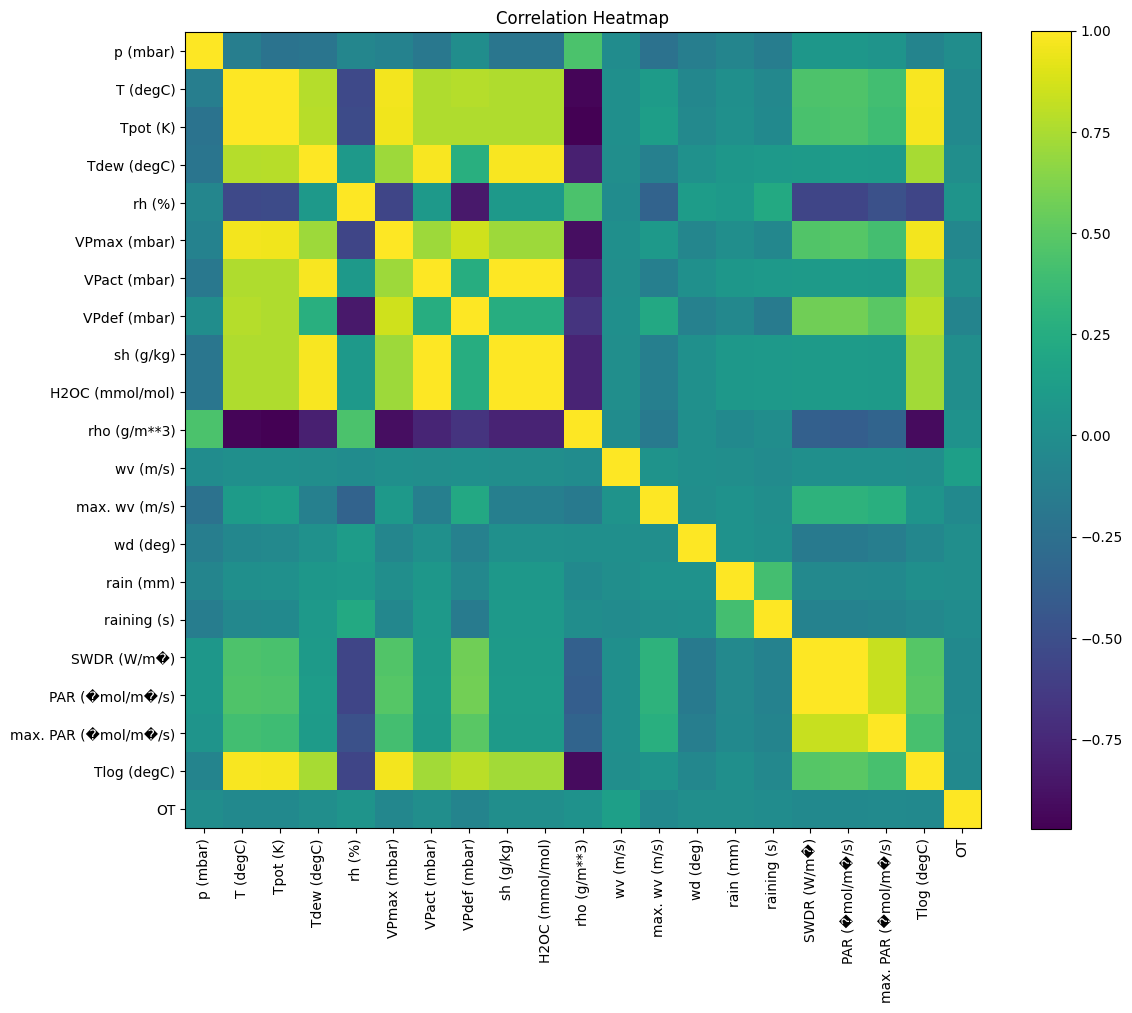

In [10]:
plt.figure(figsize=(12, 10))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

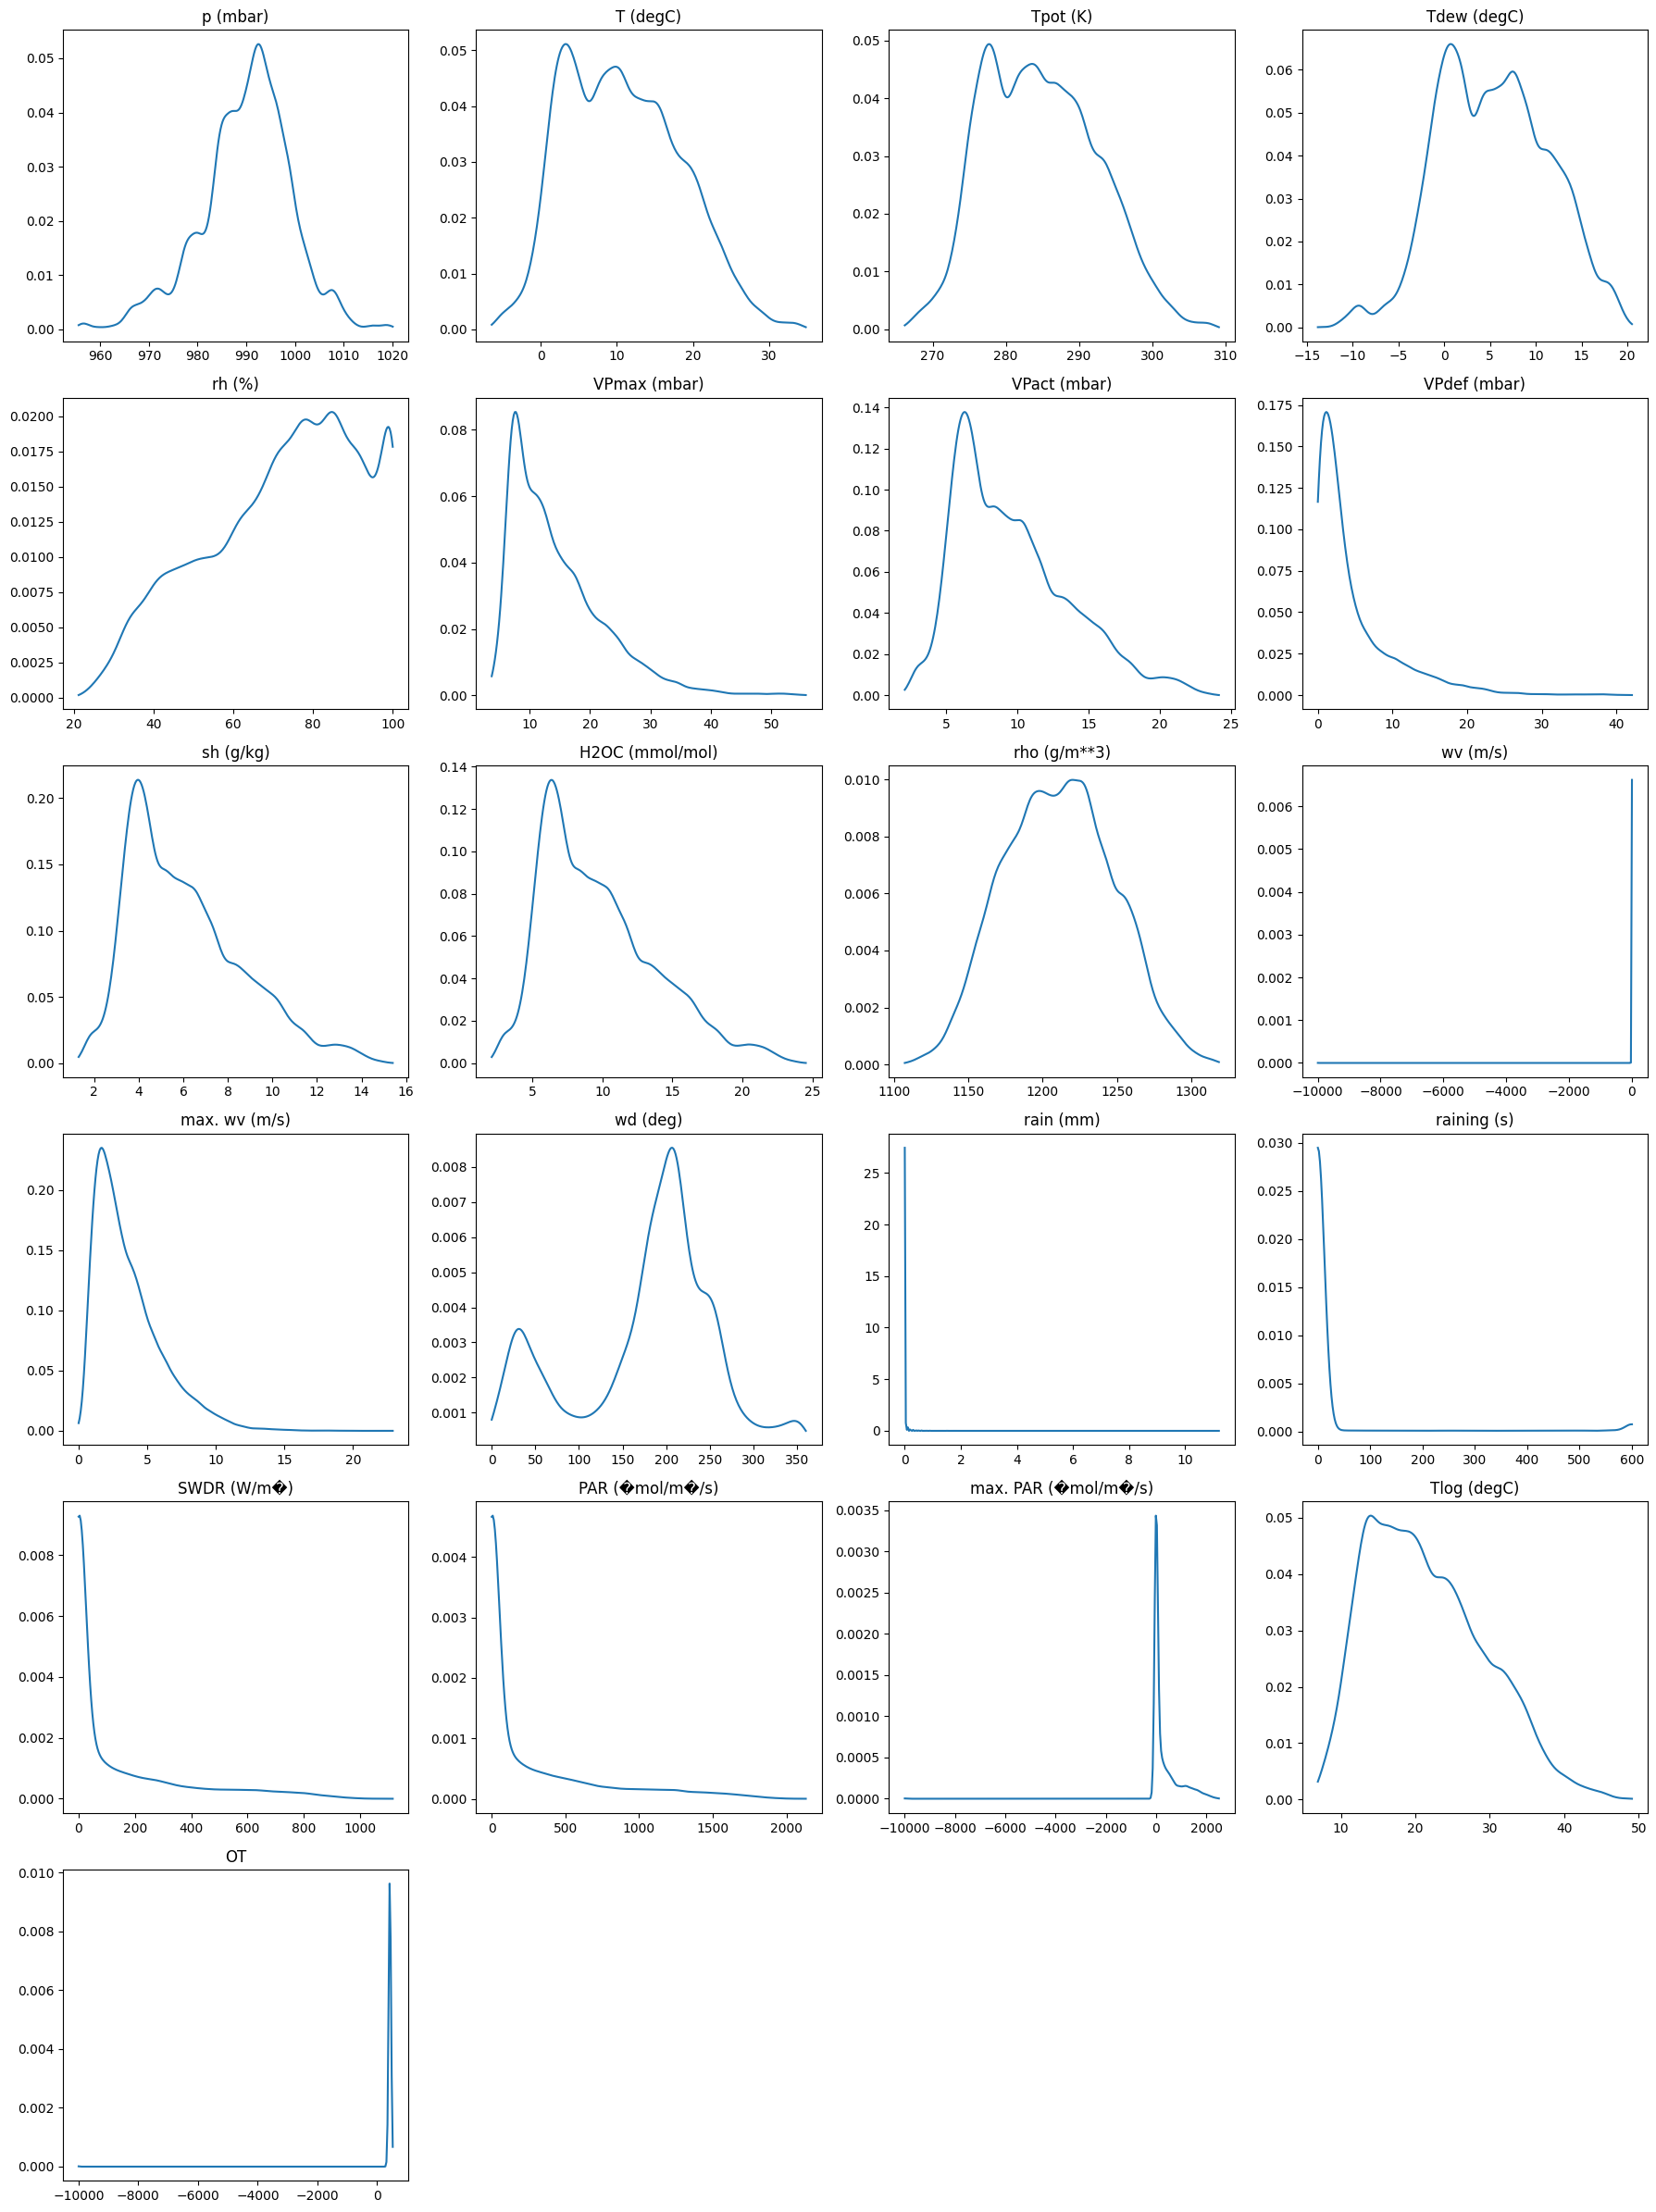

In [12]:
numeric_cols = df_weather.select_dtypes(include=np.number).columns


n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(18, n_rows * 4))


for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)

    data = df_weather[col].dropna().values
    if len(data) > 0:

        from scipy.stats import gaussian_kde
        kde = gaussian_kde(data)


        x_vals = np.linspace(min(data), max(data), 300)
        y_vals = kde(x_vals)


        plt.plot(x_vals, y_vals)
        plt.title(col)

    plt.tight_layout()

plt.show()
